In [ ]:
pip install pandas networkx numpy matplotlib

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [12]:
def match_inlinks(list_inliks, domain):
    listwithtuples = []

    for x in list_inliks:
        if x[0] == "Hyperlink" and x[1].count("/") <= x[2].count("/") and domain in x[2]:
            tuple_links = (x[1], x[2])
            listwithtuples.append(tuple_links)
    
    noduplicates = list(dict.fromkeys(listwithtuples))
    return noduplicates


def colors_index(nodes, inlinks_list):
    list_colors = []
    for node in nodes:
        match = False
        for x in inlinks_list:
            if node == x[0]:
                match = True
                if x[4] == "Non-Indexable":
                    list_colors.append("red")
                else:
                    list_colors.append("blue")

        if match == False:
            list_colors.append("yellow")
    
    return list_colors


def size_of_node(degree):
    dictionary_degree = dict(degree)
    sort_dictionary_degree = dict(sorted(dictionary_degree.items(), key=lambda item: item[1], reverse=True))
    counter = 0

    for key, value in sort_dictionary_degree.items():
        if counter < 5:
            sort_dictionary_degree[key] = key
        else:
            sort_dictionary_degree[key] = ""

        counter = counter + 1

    return sort_dictionary_degree

In [ ]:
domain = ''

In [ ]:
inlinks_df = pd.read_csv('./all_inlinks.csv')
list_inlinks = inlinks_df.values.tolist()

In [ ]:
match_links = match_inlinks(list_inlinks, domain)

In [ ]:
G = nx.Graph()
G.add_edges_from(match_links)

pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(30, 30))
nx.draw(G,pos, with_labels=True)
 
plt.savefig("graph.png")
 
plt.show()

In [10]:
df = pd.read_csv('./internal_html.csv')
list_all = df.values.tolist()

In [14]:
get_colors = colors_index(G.nodes, list_all)
get_node_size = size_of_node(G.degree)

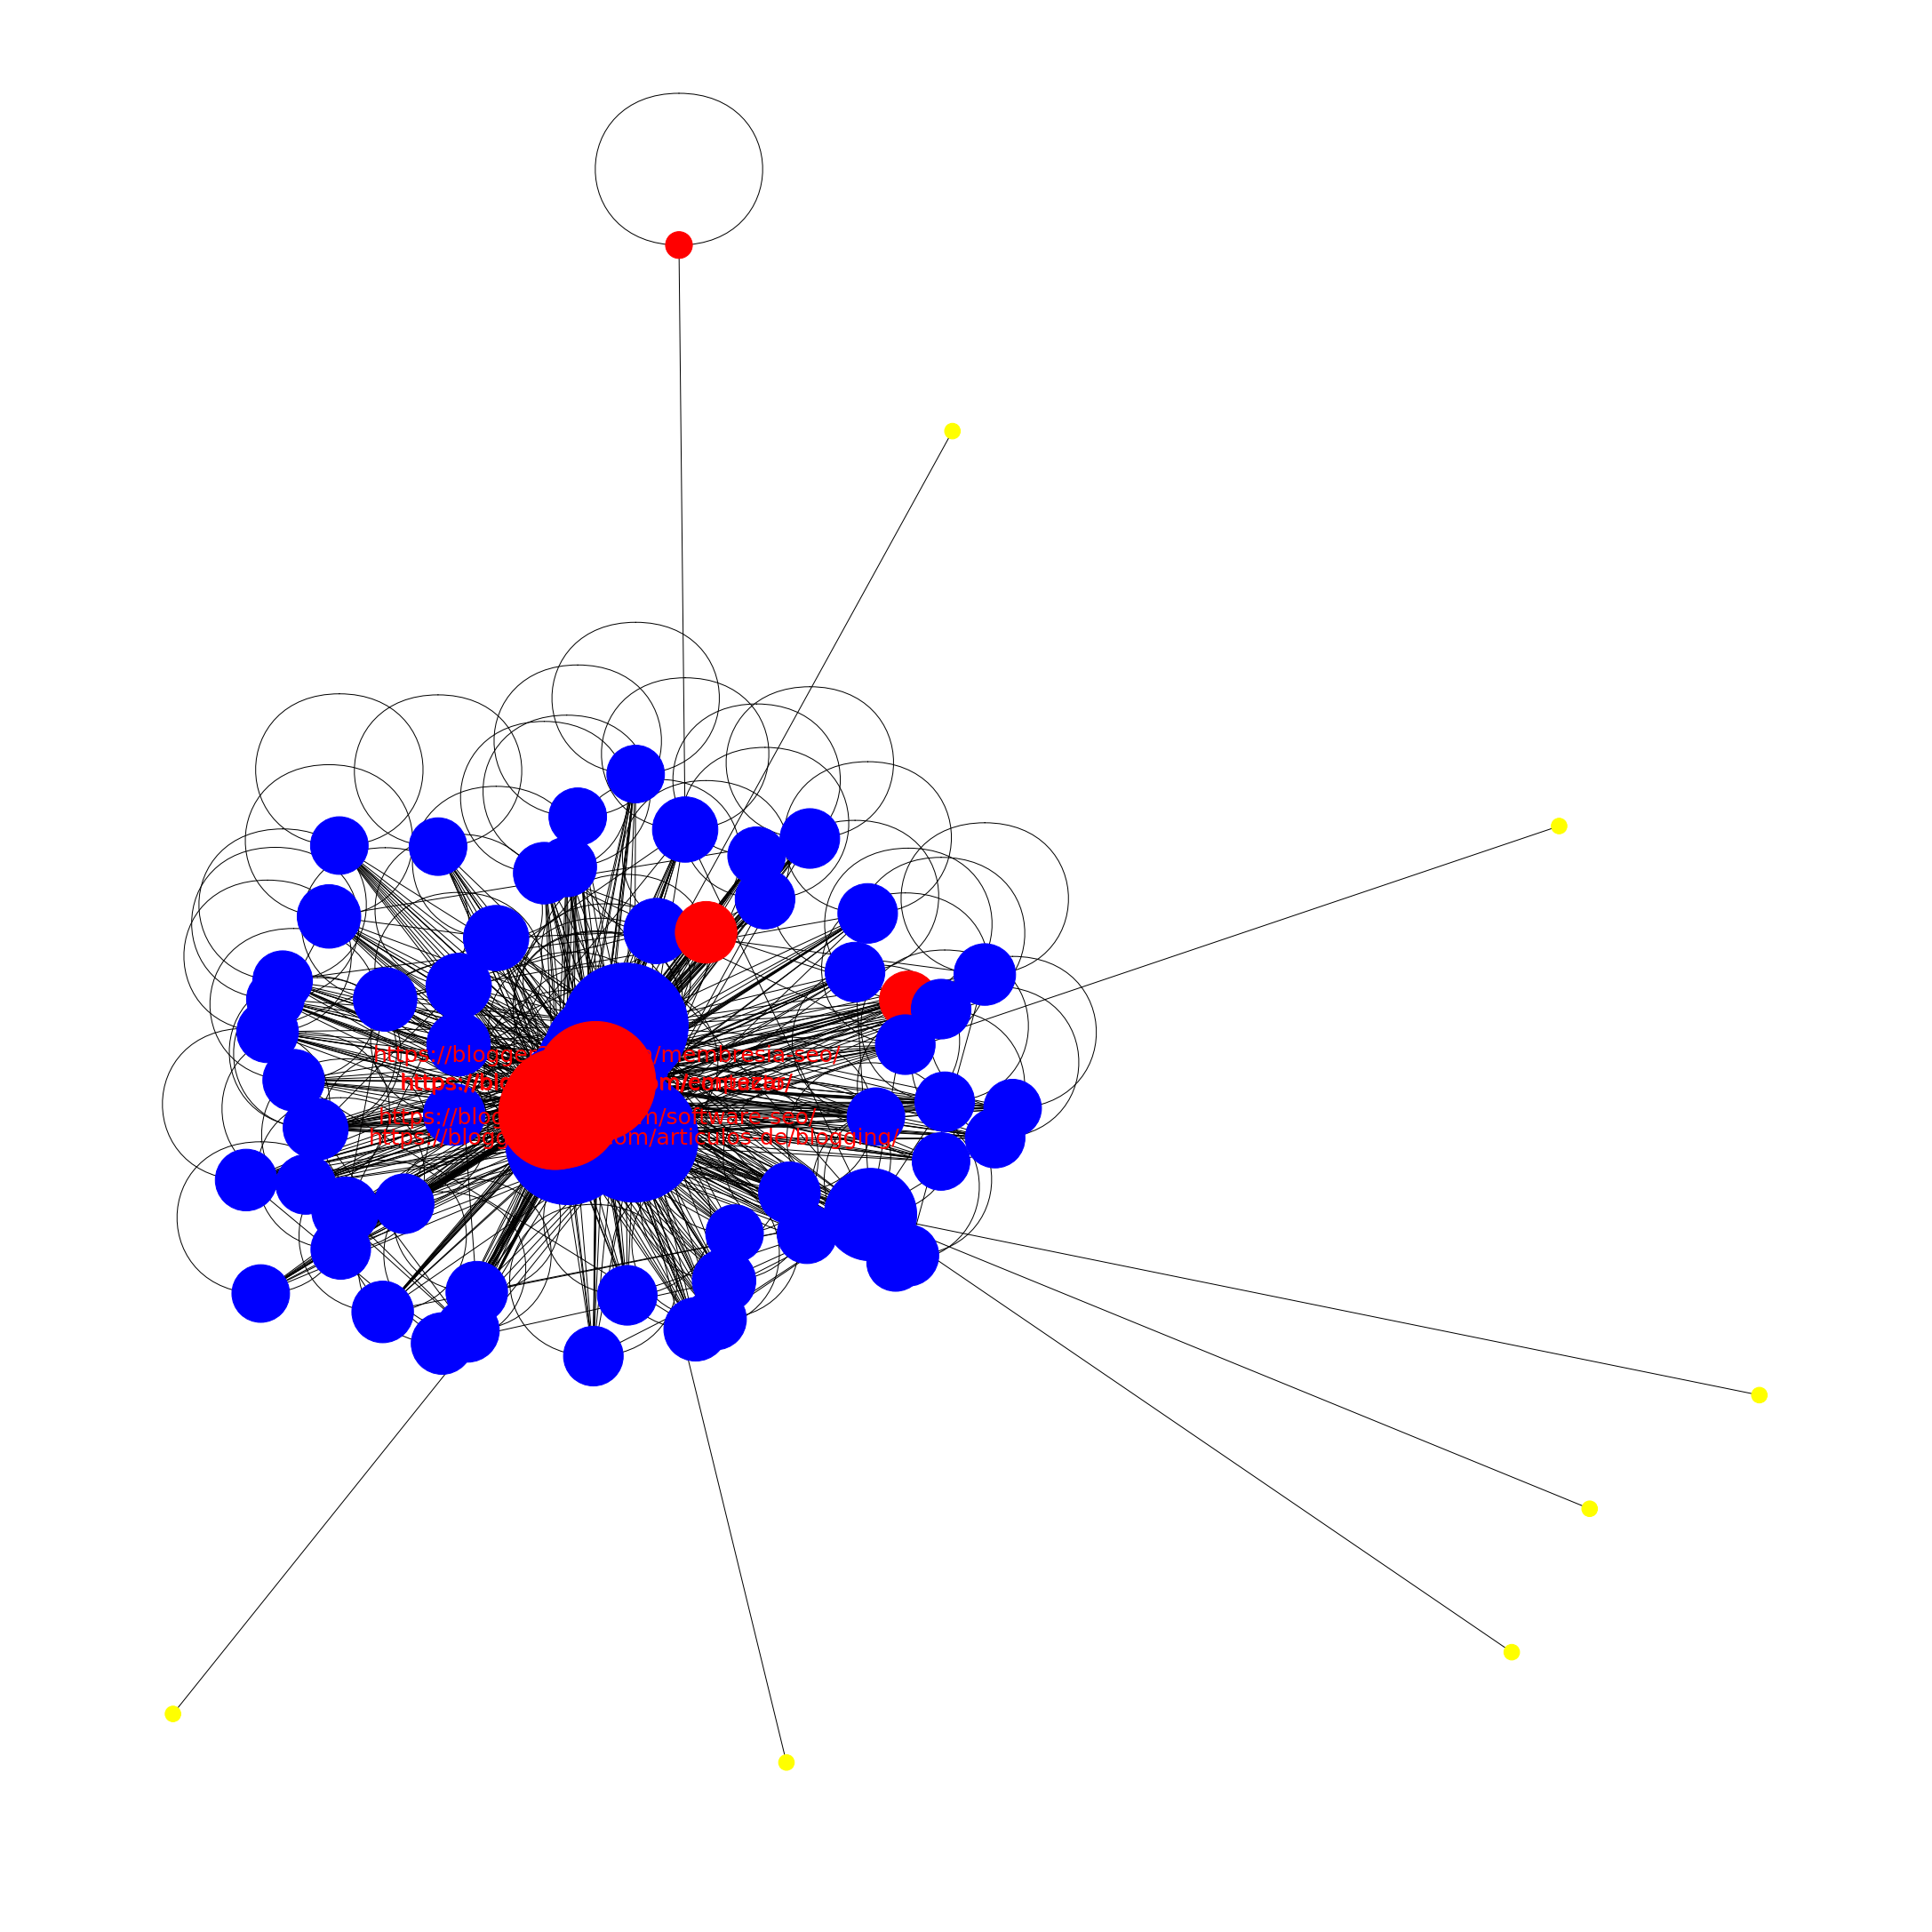

In [18]:
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(30, 30))
dictionary_degree = dict(G.degree)

nx.draw(G,pos, with_labels=False, node_size = [10 + v * 300 for v in dictionary_degree.values()],node_color = get_colors, font_size = 15)
nx.draw_networkx_labels(G,pos,get_node_size,font_size=25,font_color='r')

plt.savefig("graph_with_colors.png")

plt.show()